In [16]:
import os
os.environ["OMP_NUM_THREADS"] = "3"  # Prevent MKL memory leak warning on Windows

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

In [18]:
# Load the dataset
df = pd.read_csv("nigerian-songs.csv")

# Convert 'release_date' to 'release_year'
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year


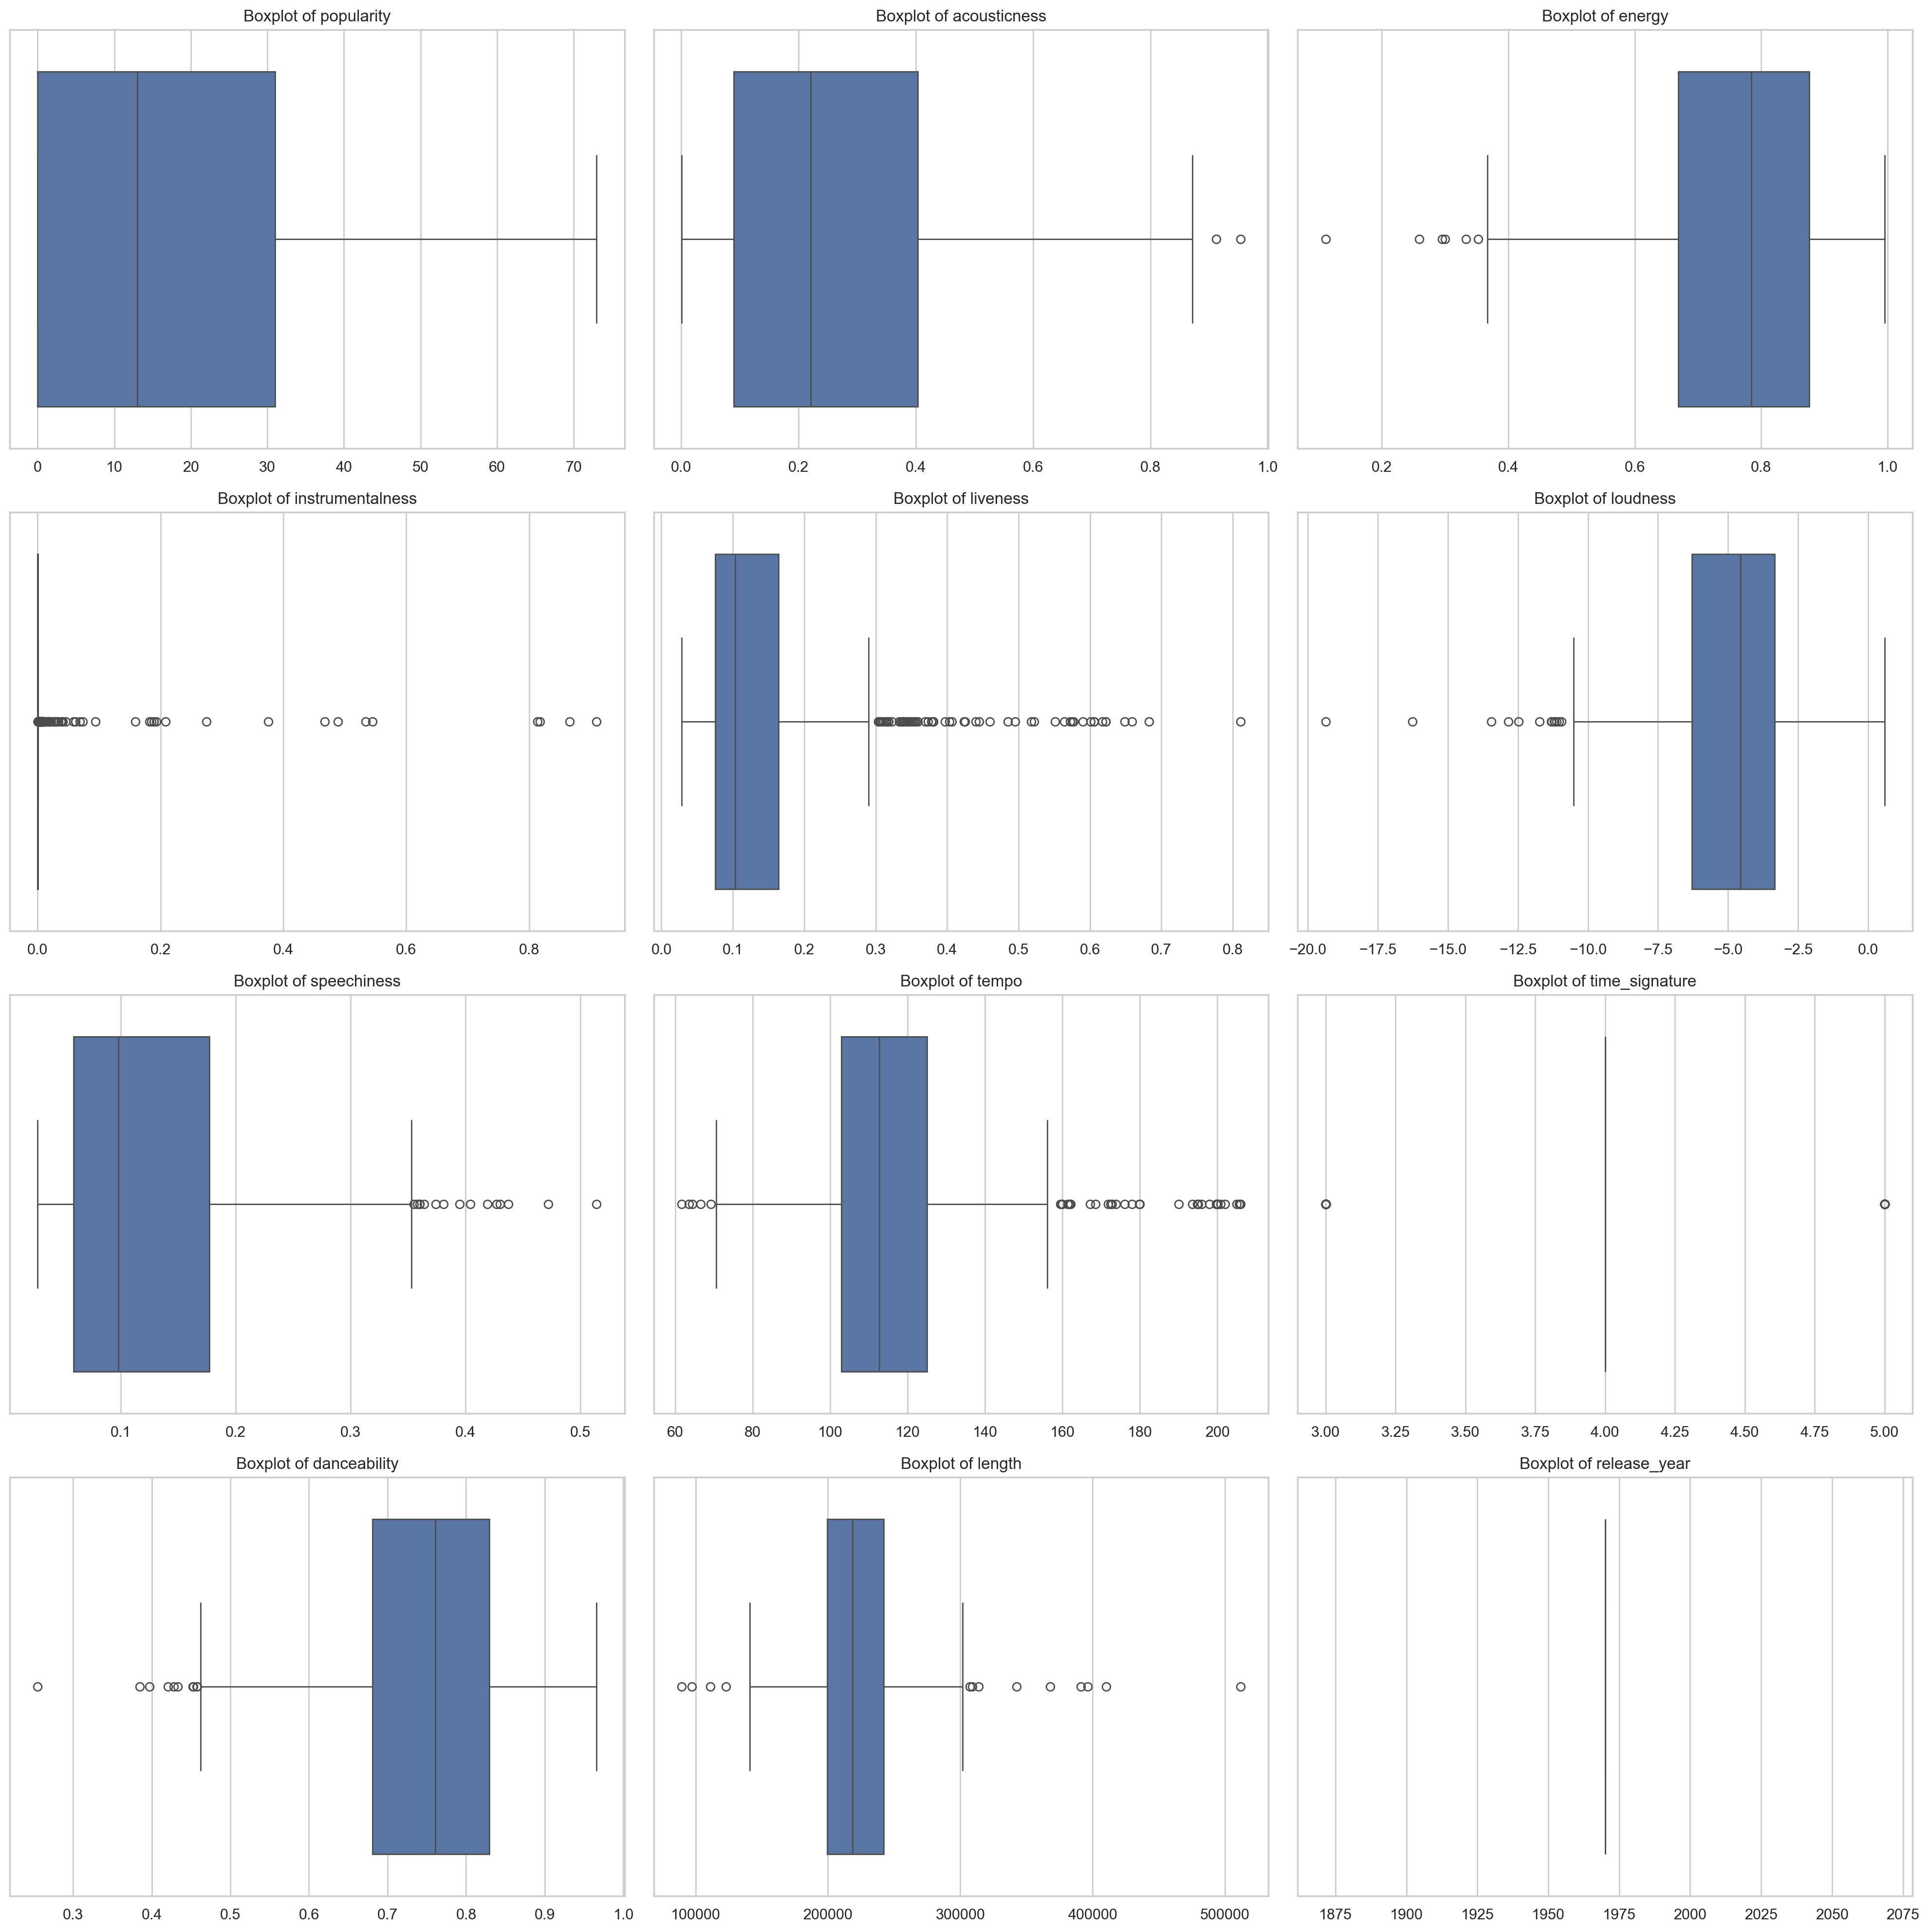

In [20]:
# Define features for plotting and clustering
features = [
    'popularity', 'acousticness', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo',
    'time_signature', 'danceability', 'length', 'release_year'
]

# Create boxplots for each feature
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20), dpi=200)

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [21]:
# Prepare the feature matrix for clustering
X = df[features].dropna()

# Apply KMeans clustering
nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict cluster labels
y_cluster_kmeans = km.predict(X)


C:\Users\Lacuesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [24]:
# Compute silhouette score
score = metrics.silhouette_score(X, y_cluster_kmeans)
print("Silhouette Score:", score)

# Add cluster labels to the DataFrame
df_clustered = X.copy()
df_clustered['cluster'] = y_cluster_kmeans

# Display sample rows
df_clustered.head()

Silhouette Score: 0.5028294677865004


,popularity,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,danceability,length,release_year,cluster
0,48,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,0.666,144000,1970,0
1,30,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3,0.710,89488,1970,0
2,40,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4,0.836,207758,1970,1
3,14,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4,0.894,175135,1970,0
4,25,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4,0.702,152049,1970,0
